##### Algorithms and Data Structures (Winter - Spring 2022)


* [Table of Contents](ADS_TOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_sandox_3.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_sandox_3.ipynb)

## About Chess



One of our elite school students coded [this interesting game](https://github.com/Mathemagician123/GuessTheOpening) which helps newcomers learn about chess game openings, as well as chess move notation.

In [1]:
import os
import requests
import zipfile
import pandas as pd
import base64

# Fetching Files & Metadata

Our first topic has little to do with chess directly, and instead is about how Github provides an API whereby the contents of individual subfolders may be returned as metadata in JSON format.

Using that metadata, we may then fetch the files that interest us, in this case .PNG files, i.e. picture files, of for each unique chess piece each side would need. We will expect to get 12 files in all.

When drawing a board, we would use the same pawn picture multiple times, plus Bishops, Knights and Rooks come in pairs, two white and two black.  Each side has a single King and Queen.

In [2]:
# https://api.github.com/repos/:owner/:repo_name/contents/:path

try:
    url = 'https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia'
    r = requests.get(url)
    if r.status_code != 200:
        raise
    data = r.json()            
except Exception:
    print("request failed")

The name `data` now binds to a list of dictionaries telling us everything we need to know about the target subfolder's contents.  If we feed data as input to `pd.DataFrame`, we'll then be able to choose which columns to display.

In [3]:
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          12 non-null     object
 1   path          12 non-null     object
 2   sha           12 non-null     object
 3   size          12 non-null     int64 
 4   url           12 non-null     object
 5   html_url      12 non-null     object
 6   git_url       12 non-null     object
 7   download_url  12 non-null     object
 8   type          12 non-null     object
 9   _links        12 non-null     object
dtypes: int64(1), object(9)
memory usage: 1.1+ KB


In [5]:
df[["name","download_url"]]

,name,download_url
0,bB.png,https://raw.githubusercontent.com/Mathemagicia...
1,bK.png,https://raw.githubusercontent.com/Mathemagicia...
2,bN.png,https://raw.githubusercontent.com/Mathemagicia...
3,bP.png,https://raw.githubusercontent.com/Mathemagicia...
4,bQ.png,https://raw.githubusercontent.com/Mathemagicia...
5,bR.png,https://raw.githubusercontent.com/Mathemagicia...
6,wB.png,https://raw.githubusercontent.com/Mathemagicia...
7,wK.png,https://raw.githubusercontent.com/Mathemagicia...
8,wN.png,https://raw.githubusercontent.com/Mathemagicia...
9,wP.png,https://raw.githubusercontent.com/Mathemagicia...


Lets take a moment to revisit [how to format pandas DataFrames](https://towardsdatascience.com/6-pandas-display-options-you-should-memories-84adf8887bc3).  Showing the above table with a wider URL column would be of interest.

In [6]:
pd.options.display.max_colwidth

50

In [7]:
pd.options.display.max_colwidth = 200

In [8]:
df[["name","url"]]

,name,url
0,bB.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/bB.png?ref=main
1,bK.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/bK.png?ref=main
2,bN.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/bN.png?ref=main
3,bP.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/bP.png?ref=main
4,bQ.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/bQ.png?ref=main
5,bR.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/bR.png?ref=main
6,wB.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/wB.png?ref=main
7,wK.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/wK.png?ref=main
8,wN.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/wN.png?ref=main
9,wP.png,https://api.github.com/repos/Mathemagician123/GuessTheOpening/contents/img/chesspieces/wikipedia/wP.png?ref=main


In [9]:
name = data[0]["name"]
url = data[0]["download_url"]
(name, url)

('bB.png',
 'https://raw.githubusercontent.com/Mathemagician123/GuessTheOpening/main/img/chesspieces/wikipedia/bB.png')

In [10]:
r = requests.get(url)

In [11]:
s = requests.get(data[0]["url"])

In [12]:
r.content  #raw bytes

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00P\x00\x00\x00P\x08\x06\x00\x00\x00\x8e\x11\xf2\xad\x00\x00\x05DIDATx\xda\xed\\]h\x1cU\x14\xbei\xb3Ru\xd5\xea*V\x1b\xb1H\xd5\xacBU\xba\x15\x15\xed\xaf\xad\x98\xd8\xfa\xa2\x82\xd2JBc \xae h\x1e\xc5$/A\xeb\x83\xf8\x90<\xd4\xb7,j(\x91\xb6P0-\x95\x05\x11\x04)\x96>Tm\xb5T\xab\xe2OL\xdb4\x89nH2\xd7sv\xbf\x897\xdb\xc9tfwf7s\xf7~\xf0\xc1\xec\xcc\x9ds\xce|\xdc\xff9\xb3B\x18\x18\x18\x18\x18\x18\x18\x18\x18\x18,\x1e\\G\xdcH\xec$\xbeI\xdc\x80s\x06\x1e\xf0\x02\xf1$Q\x16\xf1$\xae\x19\xb8\xe05\xe2\xac"\x9a\x05\xda\xbf\xf9Z\xda\xc8\xe4\x8c\x07\x88\xa3\x8ap\xc55\xd0>\xc7e\xd6\x18\xb9.\xc7\x9e\xa2\xda\xb7\x10gQ\xd6\xa0\x08\x87<\x88g\xf3\x90\x91k>\xae"\x1e\xf6!\xe001fd\x9b\x8f\x8c\x0f\x013F\xae\xcb\xb1\x8b\x98[`\x00Q\x07\x92\x7f\x89;\x8d\\\xee\xfd\xa0\xdb(l\xfa?\x17\xdcD\xfc\xcb\xa5\x06\xfeI\xbc\xd1\xc8\xe4\x8c\x1d\xc4\x1f\x893.\x02\xf2\xb5\xd3\xc4g\x8c\\\xff\xe3v\xe2>\x87\xa6*]\x9a\xb1\xc4=\xb7\xd5\xb2p1\x0c\x1c\xa3\x1e\xc5s*\xf37l\xd4\xd7\x9axq\xe2^\x9f\x

In [13]:
print(s.json()['content'] ) #base64

iVBORw0KGgoAAAANSUhEUgAAAFAAAABQCAYAAACOEfKtAAAFRElEQVR42u1c
XWgcVRS+abNSddXqKlYbsUjVrEJVuhUV7a+tmNj6ooLSSkJjIK4gaB7FJC9B
64P4kDzUtyxqKJG2UDAtlQURBCmWPlRttVSr4k9M2zSJbkgy13N2v4k328l0
ZndmN3P3fvDB7Mydc8583P85s0IYGBgYGBgYGBgYLB5cR9xI7CS+SdyAcwYe
8ALxJFEW8SSuGbjgNeKsIpoF2r/5WtrI5IwHiKOKcMU10D7HZdYYuS7HnqLa
txBnUdagCIc8iGfzkJFrPq4iHvYh4DAxZmSbj4wPATNGrsuxi5hbYABRB5J/
iTuNXO79oNsobPo/F9xE/MulBv5JvNHI5IwdxB+JMy4C8rXTxGeMXP/jduI+
h6YqXZqxxD231bJwMQwcox7FcyrzN2zU15p4ceJen8K5CbkXNmum5g2XKZ7T
vZ/VwuR6ibLiKEe4hYQ8DB9aYinx4xDEKxbxI11FfNuPeIlEQg4MDOTJxz5F
fEs38R4jnvdTo1paWuTU1FSefOxTQB7ZH9VFvKuJB/w23XQ6PScgH5fQlPfD
d+TxRCl9Wnt7+5yAfFxiv/i4DgJ+6aX2cT/X2toqOzo6ZFtbmxwcHJTT09N5
8jGf42tcxkOfaPv6Iuri3eG1tmQymbkal8vl8sJZlpUnH/M5+zqX9VELG6Is
YOciELAzygIe9fqgATdhlUeiLODvpU6MAxpEJGKIJK7HfKykVUcZ05jiwYRj
iGRayK1+J88BTKSdyDHcEtUtq/Ol1sASl3JONZBjuDaqzfjXEDYN/PKXKA8i
+xeBgJ9GWcCdIW5feV2NvBRlAfldxWQVRLR9TWAfMtJIV1HAV3XYTOA52OcV
FNH2cVRolBbMCZFnlQe04vF4fnoSBNmWmJ/NelZomIS5kXicH7ChocHKZrP5
jYJywTbYFtuEeN+IQlK6lriZ

In [14]:
b64_content = ""

def using_meta():
    """
    the url gives json metadata with content encoded in base64
    """
    global b64_content # for debugging
    try:
        for row in range(len(data)):
            name = data[row]["name"]
            url = data[row]["url"]
            r = requests.get(url)
            if r.status_code != 200:
                raise
            b64_content = r.json()['content']
            # save binaries decoded from base64 to ./static
            the_file = os.path.join(os.getcwd(), "chess", name)
            with open(the_file, 'wb') as the_file:
                the_bytes = base64.standard_b64decode(b64_content)
                the_file.write(the_bytes)
    except Exception:
        print(f"request failed for {name}, {url}, {r.status_code}")
        
def using_raw():
    """
    the download_url gives the raw content of the target file
    """
    try:
        for row in range(len(data)):
            name = data[row]["name"]
            url = data[row]["download_url"]
            r = requests.get(url)
            if r.status_code != 200:
                raise
            png_bytes = r.content
            # save binaries to ./static
            the_file = os.path.join(os.getcwd(), "chess", name)
            with open(the_file, 'wb') as the_file:
                the_file.write(png_bytes)
    except Exception:
        print(f"request failed for {name}, {url}, {r.status_code}")

Either of the two functions below should create the same .PNG files in `./chess`.

In [15]:
using_meta()
# using_raw()

Now lets practice with the subplots command, generating a 2 x 6 ndarray of axes, in each of which we may use `axes[r,c].imshow(a PNG file)`.

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [17]:
os.getcwd()

'/Users/mac/Documents/elite_school'

In [18]:
images = [the_file for the_file 
          in os.listdir("./chess/") 
          if ".png" in the_file and len(the_file.split(".")[0])==2]
images

['bB.png',
 'bK.png',
 'bN.png',
 'bP.png',
 'bQ.png',
 'bR.png',
 'wB.png',
 'wK.png',
 'wN.png',
 'wP.png',
 'wQ.png',
 'wR.png']

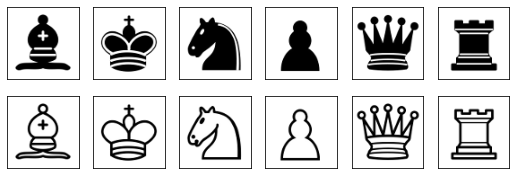

In [19]:
fig, axes = plt.subplots(2, 6, figsize=(1.5 * 6, 3))

for i in range(6):

    # row 0: black pieces
    axes[0, i].tick_params(top=False, bottom=False, left=False, right=False,
                    labelleft=False, labelbottom=False)
    img = Image.open('./static/' + images[i])
    
    axes[0, i].imshow(img)
    
    # row 1: white pieces
    axes[1, i].tick_params(top=False, bottom=False, left=False, right=False,
                   labelleft=False, labelbottom=False)
    img = Image.open('./static/' + images[i+6])
    axes[1, i].imshow(img)

# Chess Games on Kaggle

[Chess Games Dataset (Lichess)](https://www.kaggle.com/datasets/datasnaek/chess)

Games are stored using [Portable Game Notation (PGN)](https://en.wikipedia.org/wiki/Algebraic_notation_(chess)#PGN).

[Cloud based PGN viewer](https://chesstempo.com/pgn-viewer/)

[ECO Codes for Game Openings](https://www.365chess.com/eco.php)

[Chess Upsets on Kaggle](https://www.kaggle.com/code/kurner/chess-upsets) (another way to share work)

[Saved Version of Kaggle Worksheet](chess-upsets.ipynb)

In [24]:
a_game = '''d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O-O O-O-O 
Nb5 Nb4 Rc1 Nxa2 Ra1 Nb4 Nxa7+ Kb8 Nb5 Bxc2 Bxc7+ Kc8 Qd2 Qc6 Na7+ 
Kd7 Nxc6 bxc6 Bxd8 Kxd8 Qxb4 e5 Qb8+ Ke7 dxe5 Be4 Ra7+ Ke6 Qe8+ 
Kf5 Qxf7+ Nf6 Nh4+ Kg5 g3 Ng4 Qf4+ Kh5 Qxg4+ Kh6 Qf4+ g5 Qf6+ Bg6 
Nxg6 Bg7 Qxg7#'''
len(a_game.split())

61

The heavy lifting for getting `upsets.csv` was done on Kaggle, and then downloaded for this repo, under `./chess`, along with the PNG files.

In [21]:
upsets = pd.read_csv("./chess/upsets.csv", header=True, index_col=False)
upsets.columns

Index(['id', 'white_rating', 'black_rating', 'diff', 'winner',
       'victory_status', 'num_moves', 'moves'],
      dtype='object')

In [22]:
upsets.loc[:, upsets.columns[:-1]]

,id,white_rating,black_rating,diff,winner,victory_status,num_moves
0,XNMbvz8v,1997,1480,517,black,mate,70
1,uSFCK1Ib,1808,1191,617,black,mate,144
2,InSwV99D,1680,1048,632,black,mate,18
3,62tftBDD,2267,1500,767,black,mate,166
4,OvpzATGs,1707,1193,514,black,mate,48
5,4MiUKjQ0,1698,1155,543,black,mate,36
6,qTC6H6FY,1682,1015,667,black,mate,60
7,SFZMXN39,2231,1562,669,black,mate,74
8,XNMbvz8v,1997,1480,517,black,mate,70
9,XNMbvz8v,1997,1480,517,black,mate,70
